# Mazeed Pandas k tips

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = sns.load_dataset('titanic')
df.head()  # Display the first few rows of the DataFrame

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Missing value and imputing them 

In [3]:
# find out percentage of missing values in each column
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64


In [7]:
# drop the deck column from dataset, ignore error if not present
df.drop('deck', axis=1, inplace=True, errors='ignore')  
#  inplace=True modifies the DataFrame in place without returning a new one


In [8]:
df.info()  # Display DataFrame information to check changes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


In [9]:
df.columns  # Display the columns of the DataFrame

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

In [10]:
# 2 - fill missing values of age column with mean
df['age'].fillna(df['age'].mean(), inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_4672\897425327.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace=True)


In [12]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [13]:
# fill missing values of embarked  and embark town column with mode
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

In [ ]:
df.isnull().sum()
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [16]:
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_4672\395761809.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)


In [17]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [18]:
df.age.min(), df.age.max(), df.age.mean(), df.age.median()

(0.42, 80.0, np.float64(29.69911764705882), 29.69911764705882)

<Axes: xlabel='age', ylabel='Count'>

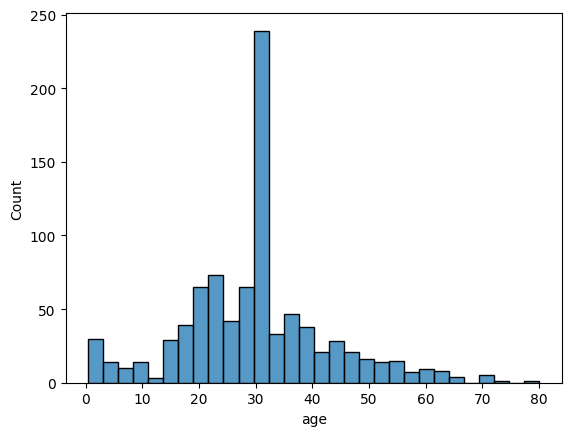

In [20]:
sns.histplot(df['age'])

In [21]:
# binning of age column into 7 categories
bins = [0,1,5,12,18,30,50,80]
lables = ['infant', 'child', 'teenager', 'young adult', 'adult', 'middle aged', 'senior']
# kis column ko bins m convert krna hain

pd.cut(df['age'], bins=bins, labels=lables, include_lowest=True, right=False, ordered=True, retbins=True)


(0            adult
 1      middle aged
 2            adult
 3      middle aged
 4      middle aged
           ...     
 886          adult
 887          adult
 888          adult
 889          adult
 890    middle aged
 Name: age, Length: 891, dtype: category
 Categories (7, object): ['infant' < 'child' < 'teenager' < 'young adult' < 'adult' < 'middle aged' < 'senior'],
 array([ 0,  1,  5, 12, 18, 30, 50, 80]))

# feature engineering 

In [23]:
bins = [0,1,5,12,18,30,50,80]
lables = ['infant', 'child', 'teenager', 'young adult', 'adult', 'middle aged', 'senior']
# kis column ko bins m convert krna hain

df['binned_age'] = pd.cut(df['age'], bins=bins, labels=lables )

In [24]:
df.head()  # Display the first few rows to verify changes

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,binned_age
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,adult
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,middle aged
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,adult
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,middle aged
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,middle aged


In [25]:
# renaming columns
df.rename(columns={'binned_age': 'age_group'}, inplace=True)
df.head()  # Display the first few rows to verify changes

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,age_group
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,adult
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,middle aged
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,adult
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,middle aged
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,middle aged


In [36]:
df['survived'].sum()  # Count of survivors

np.int64(342)

In [38]:
df_02 = df[['survived','sex','age_group','fare']]
df_02.head()  # Display the first few rows of the new DataFrame

,survived,sex,age_group,fare
0,0,male,adult,7.2500
1,1,female,middle aged,71.2833
2,1,female,adult,7.9250
3,1,female,middle aged,53.1000
4,0,male,middle aged,8.0500


In [39]:
df_02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   survived   891 non-null    int64   
 1   sex        891 non-null    object  
 2   age_group  891 non-null    category
 3   fare       891 non-null    float64 
dtypes: category(1), float64(1), int64(1), object(1)
memory usage: 22.2+ KB


In [41]:
# filter the data based on row conditions
df_02[(df_02['age_group'] == 'adult')]

,survived,sex,age_group,fare
0,0,male,adult,7.2500
2,1,female,adult,7.9250
5,0,male,adult,8.4583
8,1,female,adult,11.1333
12,0,male,adult,8.0500
...,...,...,...,...
884,0,male,adult,7.0500
886,0,male,adult,13.0000
887,1,female,adult,30.0000
888,0,female,adult,23.4500


In [42]:
# let select only those rows which have more than 200 pounds fare
df_02[df_02['fare'] > 200]

,survived,sex,age_group,fare
27,0,male,adult,263.0000
88,1,female,adult,263.0000
118,0,male,adult,247.5208
341,1,female,adult,263.0000
377,0,male,adult,211.5000
527,0,male,adult,221.7792
557,0,male,adult,227.5250
730,1,female,adult,211.3375
742,1,female,adult,262.3750
